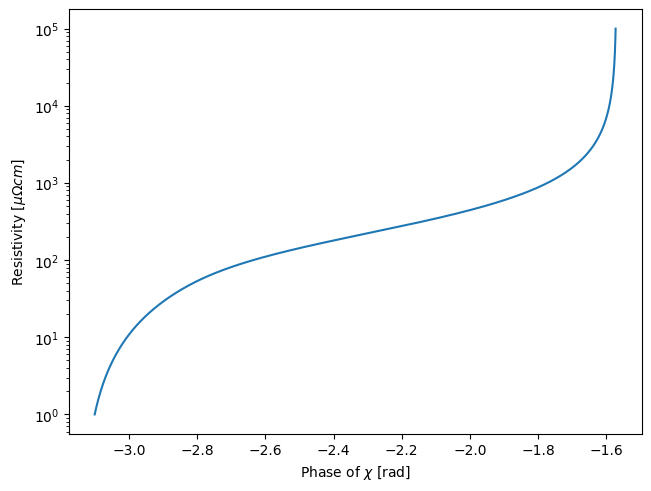

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.special import jv

def get_skin_depth(rho,frequency=671111):
    return (2*rho/(4e-7*np.pi*2 * np.pi *frequency))**.5

rhos = np.logspace(-8,-3,1000)
# a = (get_area(sample_pic,otherstuff)/np.pi)**.5 #TODO calculate area of arbitrary geometry
a = .12*25.4e-3/2 #this is the radius of the sample
chis = np.zeros(len(rhos),dtype=np.float64)
for i, rho in enumerate(rhos):
    rk =(1-1j)*a/get_skin_depth(rho)
    chis[i] = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)

fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(1, 1, 1)
ax.plot(chis,rhos*1e8)
ax.set_xlabel(r'Phase of $\chi$ [rad]')
ax.set_ylabel(r'Resistivity [$\mu \Omega cm$]')
ax.set_yscale('log')

13685 13685


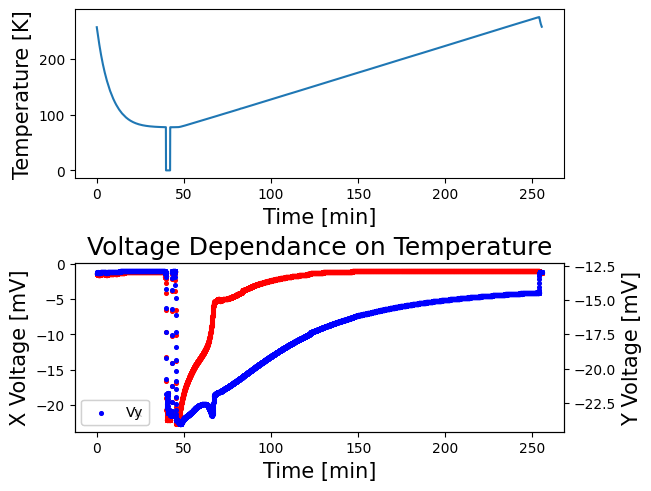

In [4]:
data_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/BW60_1part3.dat'
all_data = np.genfromtxt(data_path, delimiter='\t')
t = np.array(all_data[1:,0])
T = np.array(all_data[1:,1])
x = np.array(all_data[1:,2])*1000
y = np.array(all_data[1:,3])*1000
print(len(x),len(y))


indexes1 = np.logical_and(t >= 0, t <= 1000)
t = t[indexes1]
T = T[indexes1]
x = x[indexes1]
y = y[indexes1]

fig0 = plt.figure(constrained_layout = True)
ax0 = fig0.add_subplot(2, 1, 1)
bx1 = fig0.add_subplot(2, 1, 2)
ax0.plot(t,T)
ax0.set_xlabel('Time [min]',fontsize = 15)
ax0.set_ylabel('Temperature [K]',fontsize = 15)
# ax = fig.add_subplot(2, 1, 1)
# bx1 = fig1.add_subplot(1, 1, 1)
# ax.plot(t[first:],T[first:])
# ax.set_xlabel('Time [min]',fontsize = 15)
# ax.set_ylabel('Temperature [K]',fontsize = 15)
bx1.set_title('Voltage Dependance on Temperature',fontsize = 18)
bx1.scatter(t,x,color='red',s=7)
bx1.set_xlabel('Time [min]',fontsize = 15)
bx1.set_ylabel('X Voltage [mV]',fontsize = 15)
bx2 = bx1.twinx()
bx2.scatter(t,y,color='blue',s=7)
bx2.set_ylabel('Y Voltage [mV]',fontsize = 15)
bx1.legend(['Vx'])
bx2.legend(['Vy'])

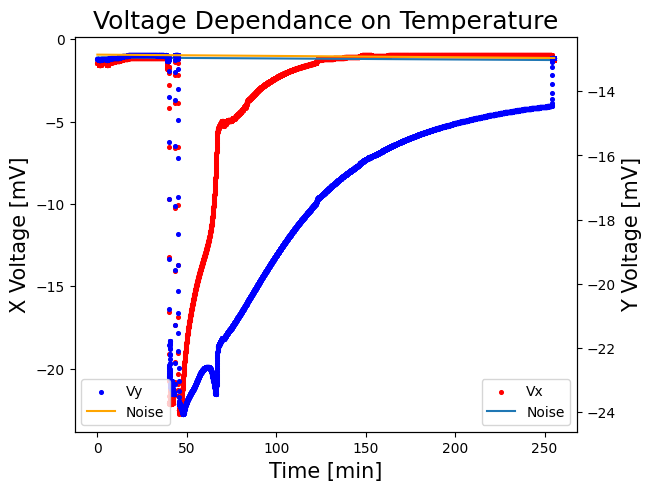

In [5]:
# Change these
intial_cal_start_time = 43.8
intial_cal_end_time = 45
final_cal_start_time = 254.2
final_cal_end_time = 255.3

run_start_time = 50
run_stop_time = 254



totaltime = (final_cal_end_time + final_cal_start_time)/2 - (intial_cal_end_time + intial_cal_start_time)/2
starts = np.logical_and(t >= intial_cal_start_time, t <= intial_cal_end_time)
ends = np.logical_and(t >= final_cal_start_time, t <= final_cal_end_time)

xslope = (x[ends].mean() - x[starts].mean())/totaltime
yslope = (y[ends].mean() - y[starts].mean())/totaltime

x_noise = xslope*(t - (intial_cal_end_time + intial_cal_start_time)/2) + x[starts].mean()
y_noise = yslope*(t - (intial_cal_end_time + intial_cal_start_time)/2) + y[starts].mean()


fig1 = plt.figure(constrained_layout = True)
bx1 = fig1.add_subplot(1, 1, 1)
bx1.set_title('Voltage Dependance on Temperature',fontsize = 18)
bx1.scatter(t,x,color='red',s=7)
bx1.plot(t,x_noise)
bx1.set_xlabel('Time [min]',fontsize = 15)
bx1.set_ylabel('X Voltage [mV]',fontsize = 15)
bx2 = bx1.twinx()
bx2.scatter(t,y,color='blue',s=7)
bx2.plot(t,y_noise,color='orange')
bx2.set_ylabel('Y Voltage [mV]',fontsize = 15)
bx1.legend(['Vx','Noise'])
bx2.legend(['Vy','Noise'])

indexes1 = np.logical_and(t >= run_start_time, t <= run_stop_time)
t = t[indexes1]
T = T[indexes1]
x = x[indexes1]
y = y[indexes1]
x_noise = x_noise[indexes1]
y_noise = y_noise[indexes1]

# remove 0 temp terms
a = 77 #lower bound
b = 300 #upper temp bound
indexes2 = np.logical_and(T >= a, T <= b)
t = t[indexes2]
T = T[indexes2]
x = x[indexes2]
y = y[indexes2]
x_noise = x_noise[indexes2]
y_noise = y_noise[indexes2]

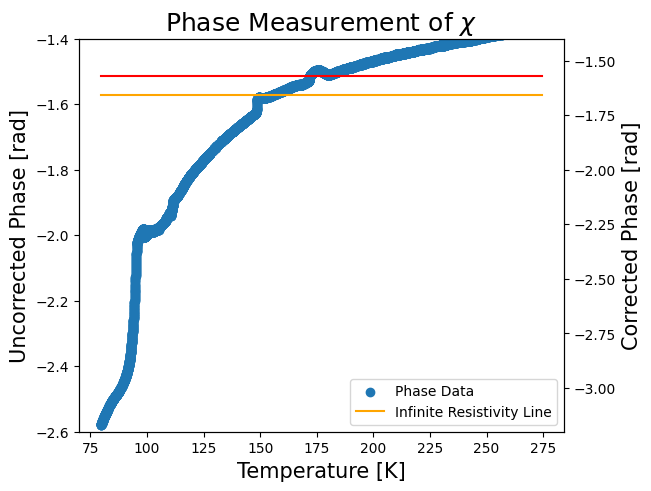

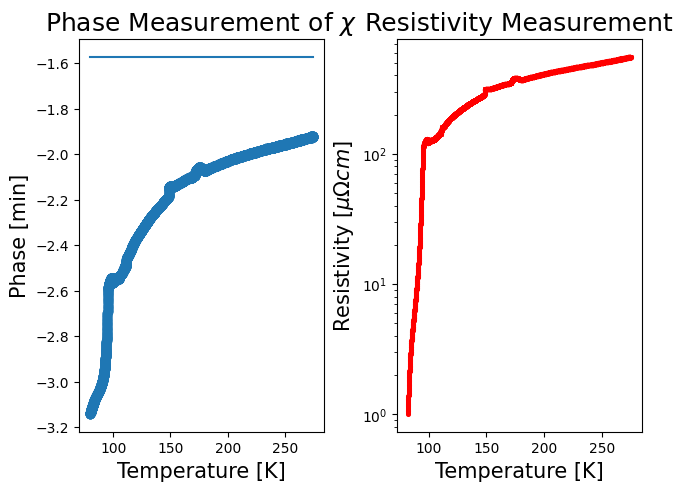

In [23]:
phase = np.angle(x-x_noise +(y-y_noise)*1j)
fig2 = plt.figure(constrained_layout = True)
ax1 = fig2.add_subplot(1, 1, 1)
ax1.scatter(T,phase)
ax1.set_xlabel('Temperature [K]',fontsize = 15)
ax1.set_ylabel('Uncorrected Phase [rad]',fontsize = 15)
ax1.set_title(r'Phase Measurement of $\chi$',fontsize = 18)
ax1.plot([T.min(),T.max()],[-np.pi/2,-np.pi/2] ,color = 'orange')
ax1.legend(['Phase Data','Infinite Resistivity Line'])
phase -= abs(phase.min() + np.pi) #this is background phase
ax2 = ax1.twinx()
# ax2.scatter(T,phase)
ax2.set_ylabel('Corrected Phase [rad]',fontsize = 15)
ax2.plot([T.min(),T.max()],[-np.pi/2,-np.pi/2] ,color = 'red')
ax2.set_ylim(-3.2,-1.4)
ax1.set_ylim(-2.6,-1.4-abs(phase.min() + np.pi))

i = np.logical_and(phase>chis[0], phase<chis[-1])
Phase2Resistivty = interp1d(chis,rhos) 

fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(1, 2, 1)
bx = fig.add_subplot(1, 2, 2)
ax.scatter(T,phase)
ax.plot([T.min(),T.max()],[-np.pi/2,-np.pi/2])
ax.set_xlabel('Temperature [K]',fontsize = 15)
ax.set_ylabel('Phase [min]',fontsize = 15)
ax.set_title(r'Phase Measurement of $\chi$',fontsize = 18)



bx.scatter(T[i],1e8*Phase2Resistivty(phase[i]),color='red',s=7)
bx.set_xlabel('Temperature [K]',fontsize = 15)
bx.set_ylabel(r'Resistivity [$\mu \Omega cm$]',fontsize = 15)
bx.set_title(r'Resistivity Measurement',fontsize = 18)
bx.set_yscale('log')

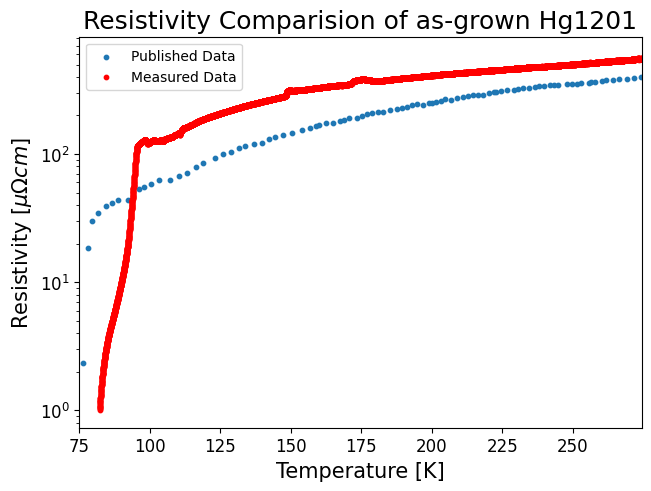

In [8]:
data_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/MikeVeitResistivityasgrown.csv'
data = np.loadtxt(data_path,delimiter=",", dtype=np.float64)
temp = data[:,0] # kelvin
res = data[:,1] #mohm cm = 1000 micro ohm cm


fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.scatter(temp,res*1000,s=10)

ax.scatter(T[i],1e8*Phase2Resistivty(phase[i]),color='red',s=10)
ax.set_xlabel('Temperature [K]',fontsize = 15)
ax.set_ylabel(r'Resistivity [$\mu \Omega cm$]',fontsize = 15)
ax.set_title(r'Resistivity Comparision of as-grown Hg1201',fontsize = 18)
ax.set_yscale('log')
ax.set_xlim(75,T.max())
ax.legend(['Published Data','Measured Data'])

plt.show()